# GAME Analysis Project
## 🕹️ 게임 데이터 분석 프로젝트

## 1. 데이터 분석 목표

● 기존 게임 데이터에 기반하여 인사이트를 얻고, 다음 분기에 어떤 게임을 설계해야하는지 결정하는 것이 프로젝트의 목표입니다.

● 데이터 분석을 통해 알고 싶은 점 
1. 지역에 따라서 선호하는 게임 장르가 다를까?
2. 연도별 게임의 트렌드가 있을까? (연도별 대륙 트렌드, 연도별 장르 트렌드, 연도별 플랫폼 트렌드)
3. 출고량이 높은 게임은 어떤 특별한 점이 있을까?


## 2. Data Description


### ▶ feature Description
▸ Dataset : https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

▸ Name : 게임의 이름입니다.

▸ Platform : 게임이 지원되는 플랫폼의 이름입니다.

▸ Year : 게임이 출시된 연도입니다.

▸ Genre : 게임의 장르입니다.

▸ Publisher : 게임을 제작한 회사입니다.

▸ NA_Sales : 북미지역에서의 출고량입니다.

▸ EU_Sales : 유럽지역에서의 출고량입니다.

▸ JP_Sales : 일본지역에서의 출고량입니다.

▸ Other_Sales : 기타지역에서의 출고량입니다.

### ▶ 사용할 Library

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
#from sklearn.preprocessing import StandardScaler
#from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 3. EDA
### 3-1. 데이터셋 기본 정보 탐색
### ▶ 전체 데이터셋

In [2]:
df = pd.read_csv('/Users/sehwajo/Downloads/vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### ▶ 프로파일링으로 EDA

In [3]:
# 판다스 프로파일링 실행하여 간단히 EDA
df.profile_report()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### ▶ 컬럼명 확인

In [4]:
# 컬럼명 확인
df.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

### ▶ 데이터타입 확인

In [5]:
# 데이터타입 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


### ▶ 중복값 확인

In [6]:
# 데이터 중복값 확인 - 중복값 없음
df.T.duplicated()

Unnamed: 0     False
Name           False
Platform       False
Year           False
Genre          False
Publisher      False
NA_Sales       False
EU_Sales       False
JP_Sales       False
Other_Sales    False
dtype: bool

### ▶ 결측치 확인

In [7]:
# 결측치 확인 - 결측치 없음
print(df.isnull().sum())

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


### ▶ Numeric features

In [8]:
# features - 전반적 정보. sales 부분을 전처리 후 다시 확인해야함
df.describe()

,Unnamed: 0,Year
count,16598.000000,16327.000000
mean,8299.500000,1994.242543
std,4791.574219,155.077168
min,1.000000,0.000000
25%,4150.250000,2003.000000
50%,8299.500000,2007.000000
75%,12448.750000,2010.000000
max,16598.000000,2020.000000


### ▶ Cardinality 확인

In [9]:
# cardinality가 높으면 과적합될 가능성이 있기 때문에 cardinality 확인 후 너무 복잡하면 과감하게 Drop
# cardinality 확인은 데이터타입이 object인 것만 진행
df.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
Genre,16548,12,Action,3305
Platform,16598,31,DS,2163
Other_Sales,16598,190,0,6386
JP_Sales,16598,282,0,10333
EU_Sales,16598,363,0,5665
NA_Sales,16598,494,0,4443
Publisher,16540,578,Electronic Arts,1351
Name,16598,11493,Need for Speed: Most Wanted,12


In [10]:
# Cardinality가 높은 특성 살펴보기 1
df['Name'].value_counts().head(10)

Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
Ratatouille                                 9
Madden NFL 07                               9
FIFA 14                                     9
LEGO Harry Potter: Years 5-7                8
Angry Birds Star Wars                       8
LEGO The Hobbit                             8
Madden NFL 08                               8
LEGO Star Wars II: The Original Trilogy     8
Name: Name, dtype: int64

In [11]:
# Cardinality 가 높은 특성 살펴보기 2
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warashi                            1
Square EA                          1
Plenty                             1
Wizard Video Games                 1
Quest                              1
Name: Publisher, Length: 578, dtype: int64

### 3-2. 개별 feature 탐색

In [12]:
# 장르 종류 확인
df.Genre.value_counts(ascending=True).head(30) 

Puzzle           578
Strategy         680
Fighting         847
Simulation       865
Platform         884
Racing          1243
Adventure       1280
Shooter         1308
Role-Playing    1483
Misc            1734
Sports          2341
Action          3305
Name: Genre, dtype: int64

<AxesSubplot:>

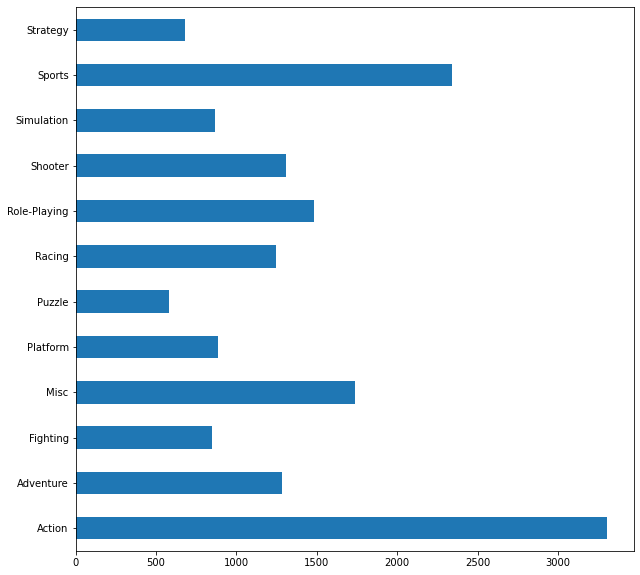

In [13]:
# 장르 종류 및 분포 시각화
df['Genre'].value_counts(sort=False).sort_index().plot.barh(figsize=(10,10))

<AxesSubplot:ylabel='Genre'>

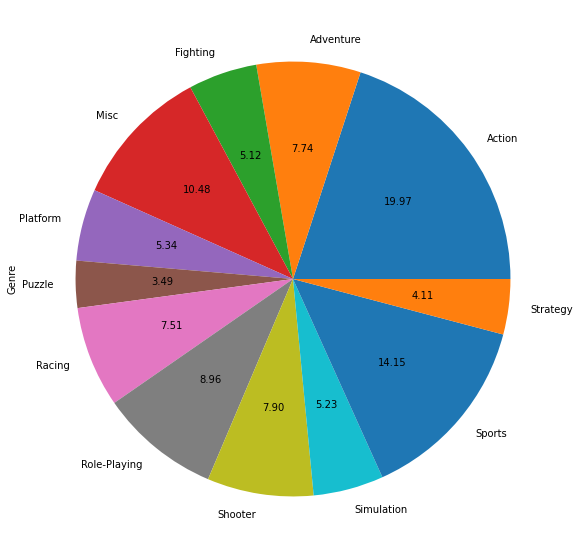

In [14]:
# 장르 종류 및 분포 시각화
df['Genre'].value_counts(sort=False).sort_index().plot.pie(autopct='%.2f', figsize=(10,10))

In [15]:
df.Platform.value_counts(ascending=False).head(30) # 플랫폼 종류 순서대로 확인

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
Name: Platform, dtype: int64

<AxesSubplot:ylabel='Platform'>

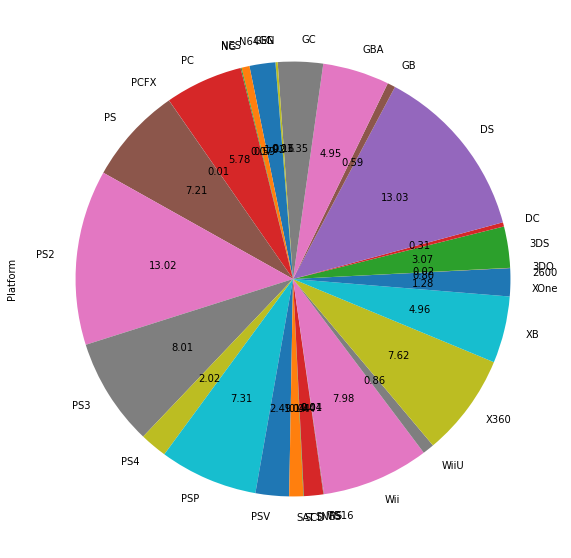

In [16]:
# 장르 종류 및 분포 시각화
df['Platform'].value_counts(sort=False).sort_index().plot.pie(autopct='%.2f', figsize=(10,10))

<AxesSubplot:>

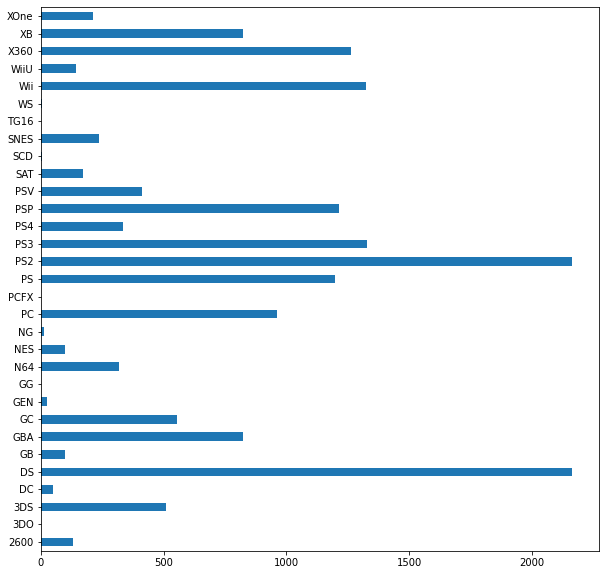

In [17]:
# 장르 종류 및 분포 시각화
df['Platform'].value_counts(sort=False).sort_index().plot.barh(figsize=(10,10))

# 4. 데이터 전처리
#### Sales feature를 파악하기 위해 우선 sales 단위를 동일하게 맞추어주었습니다.

In [18]:
# 데이터 전처리

def kdel(x) :
   
    if str(x).find('K') != -1 :
        a = str(x).replace('K','')
        a = float(a)
        a = a * 0.001
    elif str(x).find('M') != -1 :
        a = str(x).replace('M', '')
        a = float(a)
    else :
        a = float(str(x))
    
    return a
     
    
    
NA_sales = df['NA_Sales'].apply(kdel)
EU_sales = df['EU_Sales'].apply(kdel)
JP_sales = df['JP_Sales'].apply(kdel)
Other_Sales = df['Other_Sales'].apply(kdel)

df_sales = pd.concat([NA_sales, EU_sales, JP_sales, Other_Sales],axis=1)

In [19]:
# 확인
df_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04
...,...,...,...,...
16593,0.15,0.04,0.00,0.01
16594,0.01,0.00,0.00,0.00
16595,0.44,0.19,0.03,0.13
16596,0.05,0.05,0.25,0.03


In [20]:
# sale부분 제외한 나머지 컬럼
df_others = df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']]
# concat으로 전처리한 sales와 나머지 피쳐 데이터 합병
df_concat = pd.concat([df_others, df_sales],axis=1)
# 확인
df_concat

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# 5. 시각화를 통한 인사이트 도출
## 5-1. 지역에 따라서 선호하는 게임 장르가 다를까

In [21]:
Genre = df['Genre'] # 장르 데이터만

In [22]:
genre_sales = pd.concat([Genre,df_sales],axis=1) # 장르랑 지역별 출고량 합치기
genre_sales_group = genre_sales.groupby('Genre', as_index=False).sum() # 장르별로 그룹화

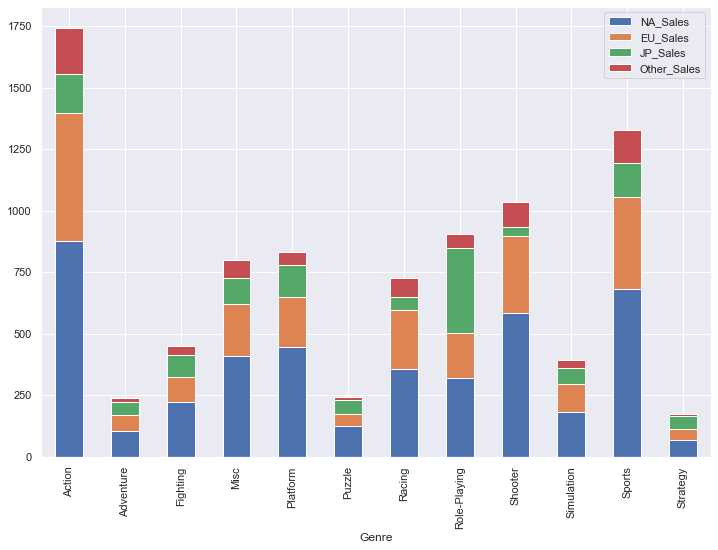

In [23]:
sns.set(rc={'figure.figsize':(12,8.27)}) # 그래프 사이즈 설정
genre_sales_group = genre_sales_group.plot.bar(x = 'Genre', stacked=True)

### 지역별 선호하는 게임 장르 분석 결과
- 북미는 액션, 스포츠, 슈터 게임을 선호
- 유럽은 액션, 스포츠, 슈터 게임을선호
- 일본은 롤플레잉,  플랫폼, 스포츠 게임을 선호
- 북아메리카는 다른 지역에 비해 모든 장르의 게임을 전반적으로 더 많이 함














## 5-2. 연도별 게임의 트렌드가 있을까
### (1) 연도별 대륙 트렌드

In [27]:
# 연도, 장르, 지역별 판매량만 추출
Year_Genre = df[['Year', 'Genre']]
Year_genre_sales = pd.concat([Year_Genre, df_sales], axis=1)

In [29]:
Year_genre_sales_group = Year_genre_sales.groupby(['Year'], as_index=False).sum() # Year 로 그룹화
Year_genre_sales_group = Year_genre_sales_group.drop(Year_genre_sales_group.index[0:23])
Year_genre_sales_group = Year_genre_sales_group.set_index('Year') # 인덱스를 Name으로 변경

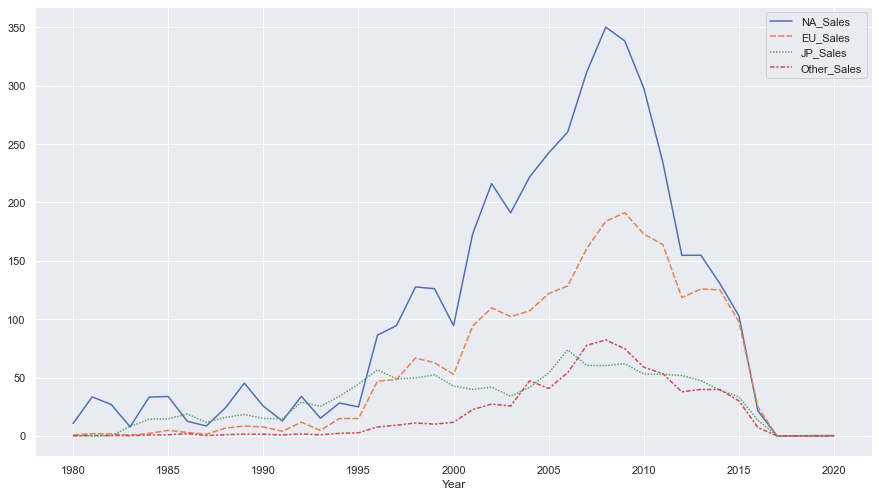

In [30]:
# 시각화
sns.set(rc={'figure.figsize':(15,8.27)})
sns.lineplot(data=Year_genre_sales_group)
plt.show()

### 연도별 대륙 트렌트 분석 결과
- 전지역 게임시장이 2000년대부터 폭발적으로 커짐
- 그 중 북미지역의 게임시장이 가장 큰 폭으로 커짐
- 2005~2010년 사이 (특히 2008-2009년) 거의 전지역 출고량이 가장 큼

In [32]:
# 연도별 장르 트렌드 시각화를 위한 전처리 
Year_result2 = Year_genre_sales.dropna(axis=0) # year의 결측치 제거 
Year_result2 = Year_result2.sort_values('Year') # Year 기준으로 오름차순 정렬

In [33]:
Year_group = Year_result2.groupby(['Year', 'Genre'], as_index = False).sum() # groupby 로 묶기

In [34]:
a = Year_group[Year_group.Year <= 100] # 이상한 연도 확인
New_Year_group = Year_group.drop(Year_group.index[0:150]) # 이상한 연도 + 추가로 과거 트렌드 제거

In [35]:
sales_sum = New_Year_group.drop(columns=['Year', 'Genre'])
sales_sum = sales_sum.sum(axis=1) # sales 값 합계 (행 기준)

In [38]:
Year_Genre_New = New_Year_group.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']) # Year & Genre 만
Year_Genre_sales_sum = pd.concat([Year_Genre_New, sales_sum], axis=1) # Year & Genre & sales_sum 
Year_Genre_sales_sum.columns=['Year','Genre','Sales Sum'] # 컬럼 이름 변경
Year_Genre_sales_sum = Year_Genre_sales_sum.reset_index(drop=True) # 인덱스 리셋 (reset_index 메서드를 호출할 때 인수 drop=True 로 설정하면 인덱스 열을 보통의 자료열로 올리는 것이 아니라 그냥 버리게 된다.)

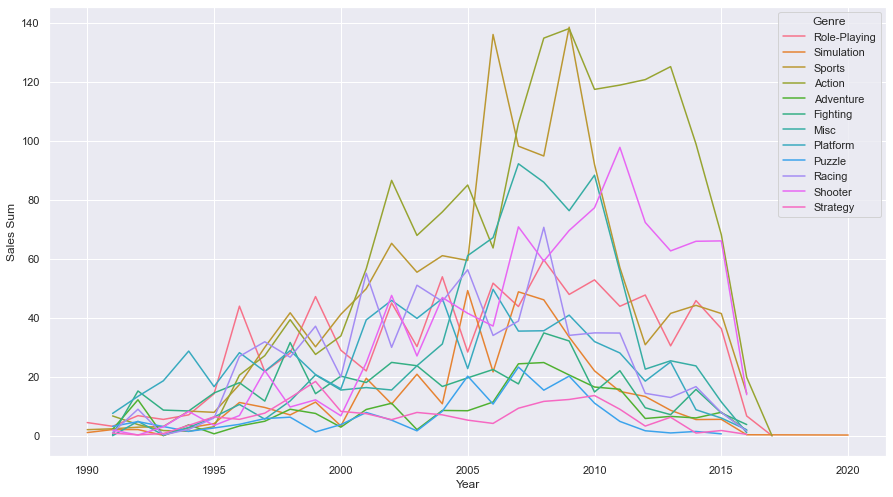

In [39]:
# 시각화
sns.set(rc={'figure.figsize':(15,8.27)})
sns.lineplot(x="Year", y="Sales Sum", hue='Genre', data=Year_Genre_ss)
plt.show()

###  연도별 장르 트렌드 분석 결과
- 2000년 이후로 액션과 스포츠가 꾸준히 가장 인기가 많음
- 2005-2010년 스포츠, 액션 순으로 인기가 많음
- 2010-2015년 액션, 슈터, 롤플레잉, 스포츠 순으로 인기가 많음
- 2015년 액션, 슈터, 스포츠, 롤플레잉 순으로 인기가 많음



In [41]:
Platform = df['Platform'] # 플랫폼 열만 추출
Platform_trend = pd.concat([Platform, Year_genre_sales], axis=1) 
Platform_trend = Platform_trend.sort_values('Year')
Platform_trend = Platform_trend.dropna()
Platform_trend = Platform_trend.drop(Platform_trend.index[0:101]) # 이상한 연도 제거(전처리)
Platform_Year = Platform_trend[['Platform', 'Year']]

In [42]:
sales_sum_forP = Platform_trend.drop(columns=['Platform', 'Year', 'Genre']) # sales만 남기기
sales_sum_forP = sales_sum_forP.sum(axis=1) # sales 값 합계 (행 기준)
Platform_trend_done = pd.concat([Platform_Year, sales_sum_forP], axis=1) # year, genre, sales sum 합치기
Platform_trend_done.columns=['Platform','Year','Sales_Sum'] # 컬럼명 변경

In [43]:
# 2006년 ~ 최근년도만 뽑아보기
Platform_order = Platform_trend_done.sort_values(by='Year', ascending=False)
Platform_order = Platform_order.head(10120) #2006년 이후로만 선택

In [44]:
PO = Platform_order.set_index('Platform')
PO = PO.sort_values(by='Sales_Sum' ,ascending=False)
PO = PO.reset_index()
PO = PO.groupby('Platform', as_index=False).sum() # 장르별로 그룹화
PO = PO[['Platform', 'Sales_Sum']]
PO = PO.sort_values(by='Sales_Sum' ,ascending=False)

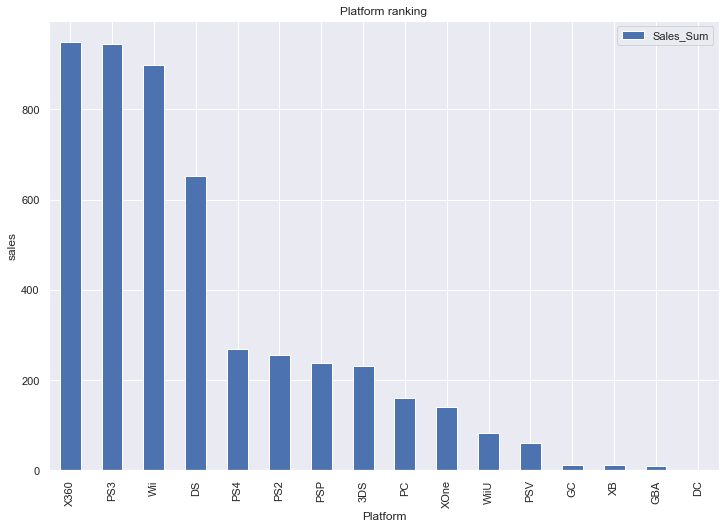

In [45]:
sns.set(rc={'figure.figsize':(12,8.27)}) # 그래프 사이즈 설정
GraphPO = PO.plot.bar(x = 'Platform', stacked=False)
plt.title("Platform ranking")
plt.ylabel("sales")
plt.show()

### 연도별 플랫폼 트렌드 분석 결과 1
2006년 이후 출고량이 가장 높은 게임 데이터만 선택 2006년 '이후 가장 출고량이 높은 플랫폼' 위주로 시각화
- 1순위 X360
- 2순위 PS3
- 3순위 Wii
- 4순위 DS
- 5순위 PS4

In [109]:
# 2006년 ~ 최근 년도만 뽑아보기
Platform_order = Platform_trend_done.sort_values(by='Year' ,ascending=False)
Platform_order = Platform_order.set_index('Platform')
Platform_order_T = PO1.T
Platform_order_T = Platform_order_T[['X360', 'PS3', 'Wii', 'DS', 'PS4', 'PS2', '3DS', 'XOne', 'WiiU']]
POT = Platform_order_T.T

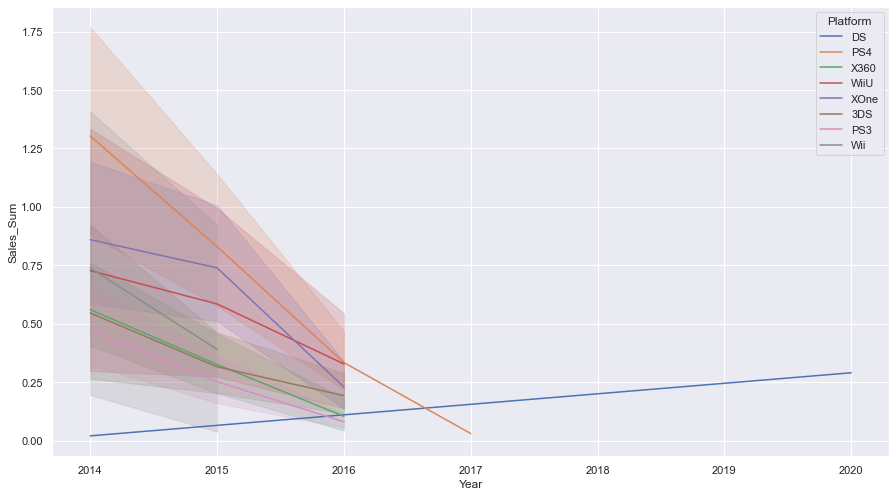

In [110]:
POT.reset_index(inplace=True)
POT.sort_values(by='Year' ,ascending=False, inplace=True)
POT_2014= POT.head(1111) #2014년 이후의 출고량만 추출

# 시각화
sns.set(rc={'figure.figsize':(15,8.27)})
sns.lineplot(x="Year", y="Sales_Sum", hue='Platform', data=POT_2014)
plt.show()

### 연도별 플랫폼 트렌드 분석 결과 2
- 2014년 이후 출고량이 높은 플랫폼은 PS4, XOne, WiiU, Wii
- PS2는 2014년 이후 출고량이 없음 - 오래된 플랫폼
- DS 는 2014년 이후로도 꾸준히 증가

# 5-3. 출고량이 높은 게임은 어떤 특별한 점이 있을까?

In [87]:
# only_sales = genre_sales.drop(columns=['Genre']) # 데이터프레임 sales 만남기기
only_sales_sum = df_sales.sum(axis=1) # sales 합계
only_sales_sum = pd.DataFrame(only_sales_sum) # 데이터프레임에 넣기
only_sales_sum.columns=['Sales_sum'] # 컬럼 이름 변경

In [88]:
new_df = df.drop(columns=['Unnamed: 0', 'NA_Sales' , 'EU_Sales' , 'JP_Sales', 'Other_Sales'])
new_df = pd.concat([new_df, only_sales_sum], axis=1) # 로우데이터 + 총 출고량 합계

In [91]:
sales_sort = new_df.sort_values(by=['Sales_sum'], ascending=False) # sales_sum 기준 내림차순으로 총 출고량 높은 순 보여주기
sales_sort_index = sales_sort.set_index('Name') # 인덱스를 Name으로 변경
sales_sort_index.head(15) # 출고량 가장 높은 게임 10개만 출력

,Platform,Year,Genre,Publisher,Sales_sum
Name,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.83
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.38
Tetris,GB,1989.0,Puzzle,Nintendo,30.26
New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01
Wii Play,Wii,2006.0,Misc,Nintendo,29.01
New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.61



### 출고량이 높은 게임 분석 결과
#### 🏆 출고량이 높은 게임 순위
- 1위 Wii Sports	
- 2위 Super Mario Bros.
- 3위 Mario Kart Wii  
<br/>
<br/>

#### 🏆 출고량이 높은 퍼블리셔 순위
- 1~15 위 전부 닌텐도
<br/>
<br/>

#### 🏆 출고량이 높은 플랫폼 순위
- 1, 3, 4위 Wii 
- 15위 순위권 안에 든 Wii가 7개<br/>
<br/>

#### 🏆 출고량이 높은 장르 순위
- 1위 스포츠
- 2위 플랫폼
- 3위 레이싱
<br/>
<br/>
<br/>